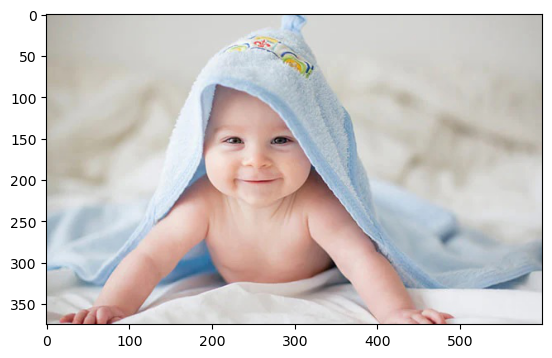

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

image = Image.open("assets/sample.jpg")
image_array = np.array(image)
imgplot = plt.imshow(image)

In [2]:
xlim = image_array.shape[0]
ylim = image_array.shape[1]
zlim = image_array.shape[2]
image_array.shape

(375, 600, 3)

In [3]:
kernel = np.ones((5, 5)) / 25
kernel.shape

(5, 5)

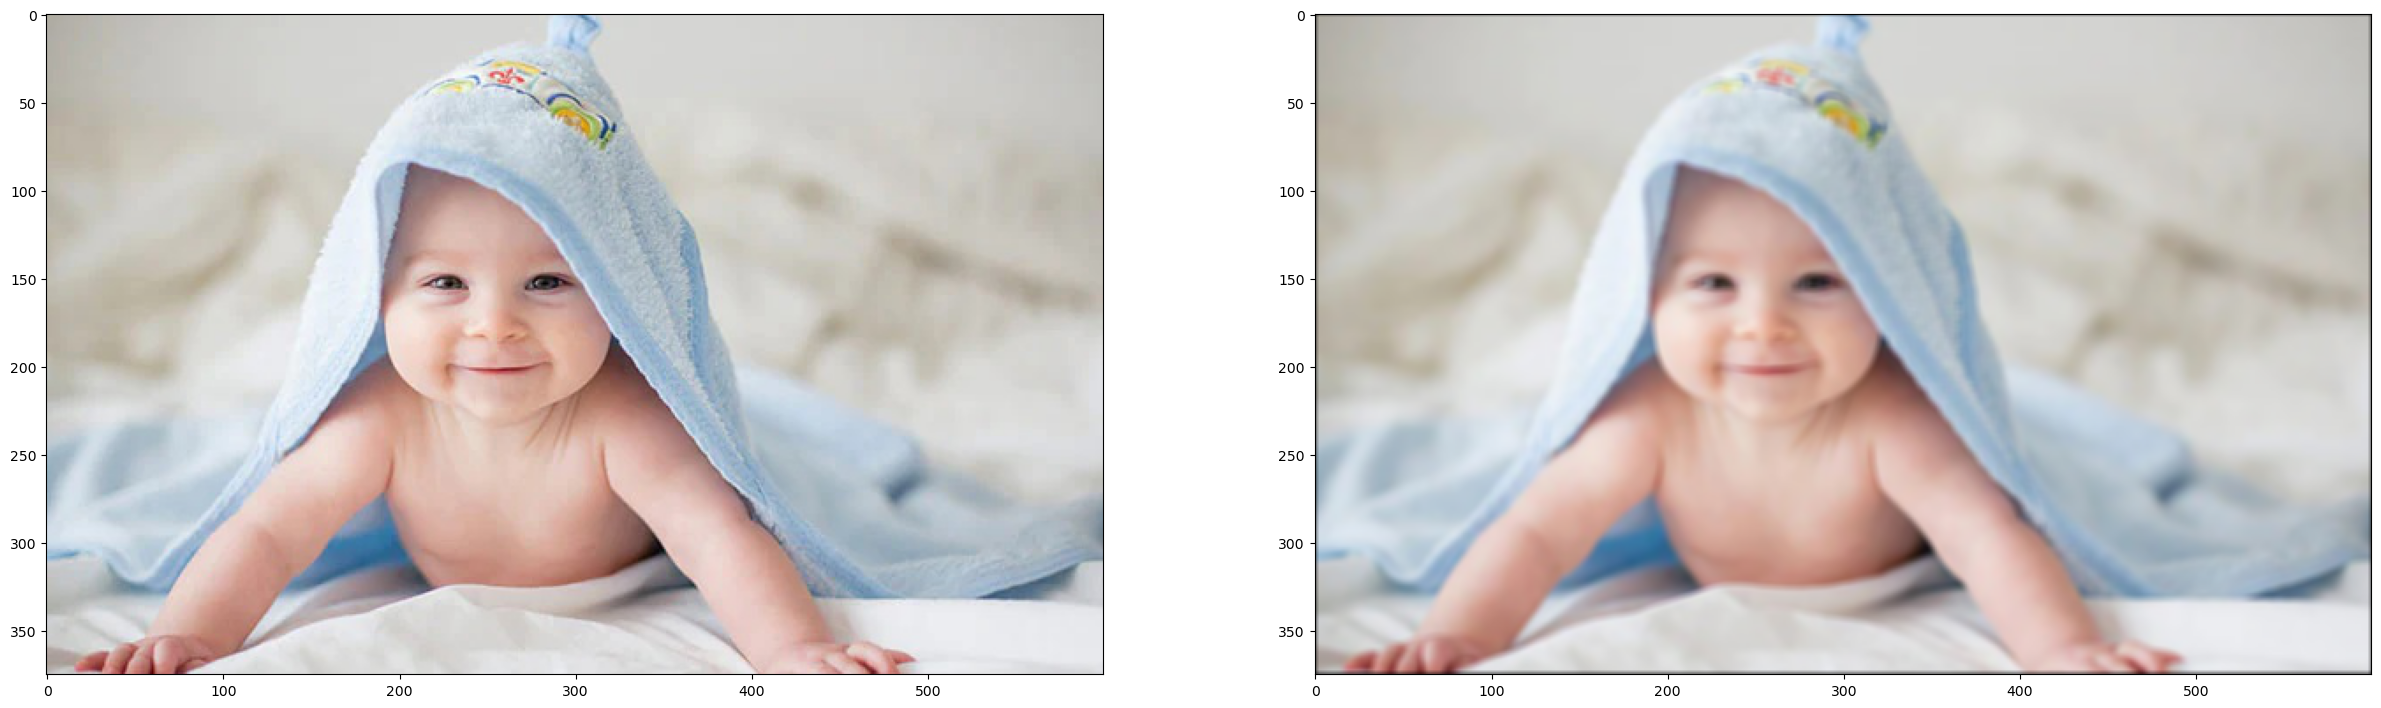

In [4]:
kernel_height, kernel_width = kernel.shape
pad_height = kernel_height // 2
pad_width = kernel_width // 2
    
# Pad the image with zeros on the border
padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant')
blurred_image = np.zeros_like(image)

for x in range(xlim):
    for y in range(ylim):
        for z in range(zlim):
            blurred_image[x, y, z] = np.sum(
                kernel * padded_image[x:x+kernel_width, y:y+kernel_height, z]
            )

f,axarr = plt.subplots(1,2,figsize=(30,30))
axarr[0].imshow(image)
axarr[1].imshow(blurred_image)

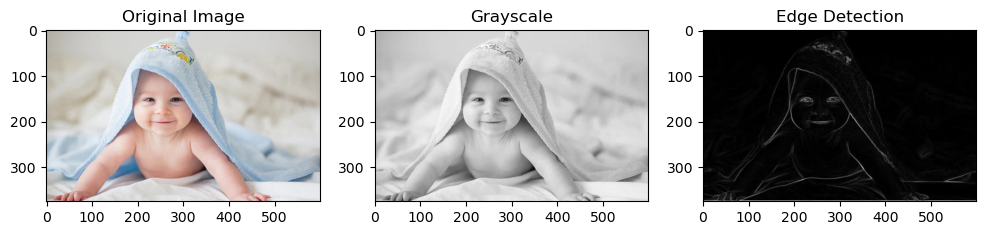

In [5]:
if image_array.ndim == 3:
    # grayscale
    image_array = np.dot(image_array[..., :3], [0.2627, 0.6780, 0.0593])

# sobel kernels
horizontal_edge = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
vertical_edge = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

def apply_convolution(image, kernel):
    height, width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    convolved_image = np.zeros_like(image)
    
    for y in range(height):
        for x in range(width):
            convolved_image[y, x] = np.sum(kernel * padded_image[y:y+kernel_height, x:x+kernel_width])
    
    return convolved_image

edges_x = apply_convolution(image_array, horizontal_edge)
edges_y = apply_convolution(image_array, vertical_edge)

edges = np.sqrt(edges_x**2 + edges_y**2)

# Display the original and edge-detected images
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_array, cmap='gray')
ax[1].set_title('Grayscale')
ax[2].imshow(edges, cmap='gray')
ax[2].set_title('Edge Detection')
plt.show()